# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [24]:
# --- Step 1: Importing Required Libraries ---
# We'll use pandas for data manipulation, matplotlib and seaborn for visualization,
# numpy for numerical operations, and random for data generation.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(42)  # Set the seed for the 'random' library
np.random.seed(42)  # Set the seed for NumPy

print("Step 1: Libraries imported successfully.")

Step 1: Libraries imported successfully.


## Step 2: Generating Test Data

In [25]:
# --- Step 2: Generating Test Data ---
# We'll create a CSV file with simulated tweet data.  This includes:
# - tweet_id: Unique identifier for each tweet.
# - category:  The category the tweet belongs to (e.g., News, Sports, Entertainment, Tech).
# - likes: The number of likes the tweet received.
# - date:  The date the tweet was posted.
# - user_id: User ID.
# We'll intentionally include outliers and missing values.

def generate_test_data(num_rows=1000, filename="simulated_tweets.csv"):
    """
    Generates simulated tweet data and saves it to a CSV file.

    Args:
        num_rows: The number of rows (tweets) to generate.
        filename: The name of the CSV file to save the data to.
    """

    categories = ["News", "Sports", "Entertainment", "Tech", "Food", "Travel", "Fashion"]
    data = []

    for i in range(num_rows):
        tweet_id = i + 1
        category = random.choice(categories)
        # Generate likes with a skewed distribution (most tweets have few likes, some have many)
        likes = int(np.random.exponential(scale=50))  # Exponential distribution
        # Add some outliers
        if random.random() < 0.02:  # 2% chance of being an outlier
            likes = random.randint(500, 2000)
        date = pd.to_datetime('2023-01-01') + pd.to_timedelta(random.randint(0, 364), unit='D')
        user_id = f"user_{random.randint(1, 100)}"
        data.append([tweet_id, category, likes, date, user_id])


    df = pd.DataFrame(data, columns=["tweet_id", "category", "likes", "date", "user_id"])

    # Introduce some missing values (NaNs)
    for col in ["category", "likes"]:
        missing_indices = df.sample(frac=0.05).index  # 5% missing
        df.loc[missing_indices, col] = np.nan

    df.to_csv(filename, index=False)
    print(f"Step 2: Simulated data generated and saved to {filename}")

generate_test_data()

Step 2: Simulated data generated and saved to simulated_tweets.csv


## Step 3: Load Data

In [26]:
# --- Step 3: Load Data ---
# Load the data from the CSV file into a pandas DataFrame.

def load_data(filename="simulated_tweets.csv"):
    """Loads data from the specified CSV file."""
    try:
        df = pd.read_csv(filename)
        print("Step 3: Data loaded successfully.")
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.  Make sure to run Step 2 first.")
        return None

df = load_data()

if df is not None: #Ensure df is available for next steps.
    print(df.head())

Step 3: Data loaded successfully.
   tweet_id category  likes        date  user_id
0         1   Travel   23.0  2023-05-21  user_32
1         2   Sports  150.0  2023-02-22  user_87
2         3   Travel   65.0  2023-02-14  user_76
3         4      NaN   45.0  2023-02-17  user_28
4         5   Sports    NaN  2023-01-14  user_72


## Step 4: Data Understanding and Cleaning

In [27]:
# --- Step 4: Data Understanding and Cleaning ---

# 4.1 Data Description and Summary Statistics
print("\n--- 4.1 Data Description and Summary Statistics ---")
print(df.info())  # Data types, non-null counts
print(df.describe())  # Descriptive statistics (count, mean, std, min, max, etc.)
print(df.isnull().sum()) # Check for missing values

# 4.2 Data Cleaning

# 4.2.1 Handling Missing Values
print("\n--- 4.2.1 Handling Missing Values ---")
# For 'category', we'll drop rows with missing values since it's a categorical feature.
df.dropna(subset=['category'], inplace=True)

# For 'likes', we'll impute missing values with the median (more robust to outliers than mean).
median_likes = df['likes'].median()
# df['likes'].fillna(median_likes, inplace=True)  # This caused the warning (chained assignment)

# Correct way to avoid chained assignment warning:
df.loc[:, 'likes'] = df['likes'].fillna(median_likes) # Use .loc for combined row/column selection

print(df.isnull().sum()) # Verify missing values are handled
# convert date to datetime
df['date'] = pd.to_datetime(df['date'])


--- 4.1 Data Description and Summary Statistics ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1000 non-null   int64  
 1   category  950 non-null    object 
 2   likes     950 non-null    float64
 3   date      1000 non-null   object 
 4   user_id   1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB
None
          tweet_id        likes
count  1000.000000   950.000000
mean    500.500000    76.468421
std     288.819436   196.398711
min       1.000000     0.000000
25%     250.750000    13.000000
50%     500.500000    35.000000
75%     750.250000    70.750000
max    1000.000000  1949.000000
tweet_id     0
category    50
likes       50
date         0
user_id      0
dtype: int64

--- 4.2.1 Handling Missing Values ---
tweet_id    0
category    0
likes       0
date        0
user_id     0
dtype: int64


## Step 5: Data Visualization


--- 5.1 Distribution of Likes ---


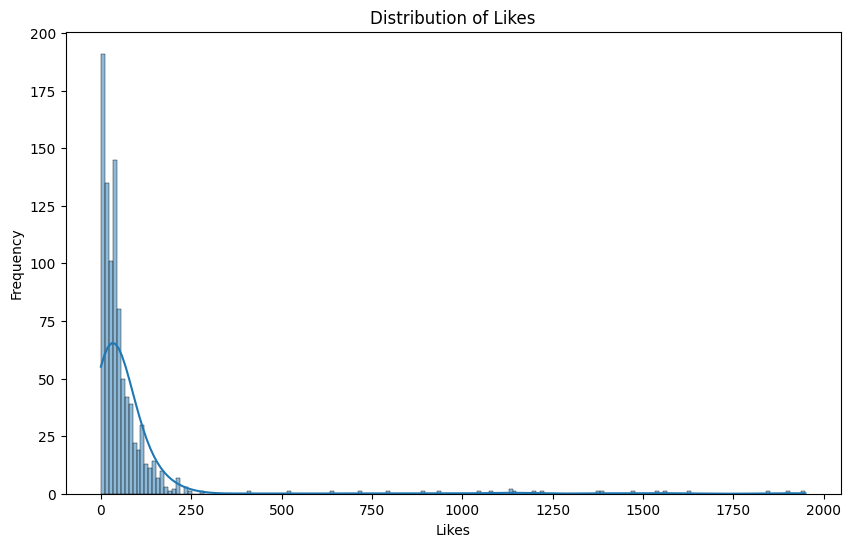


--- 5.2 Likes by Category ---


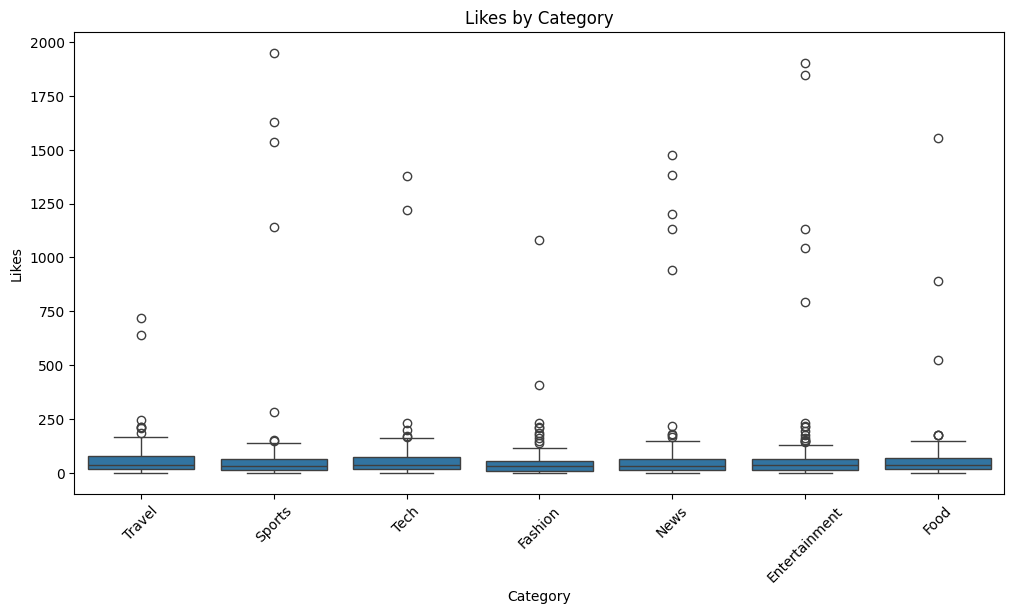


--- 5.3.1 Count categories ---


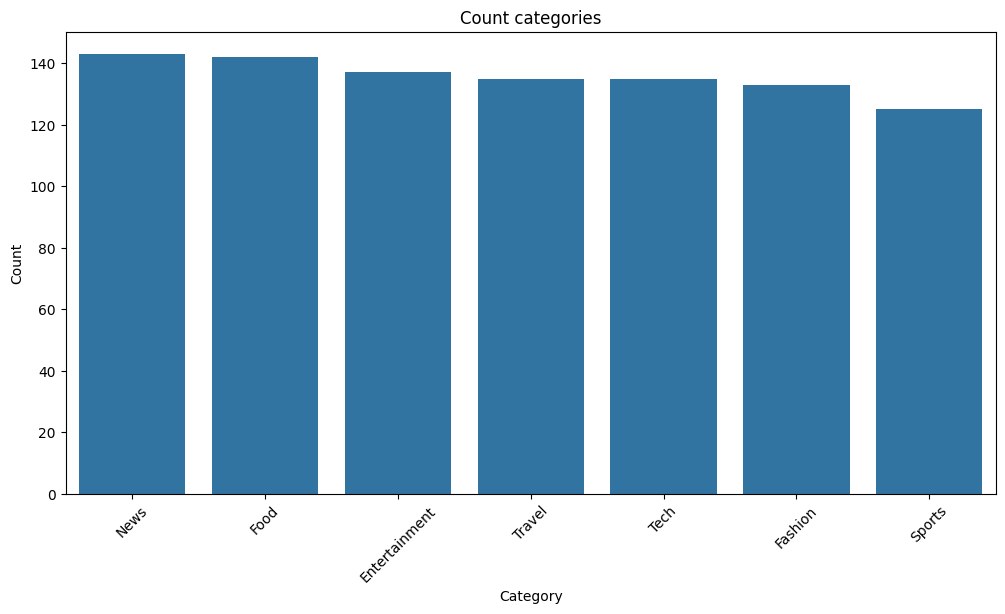


--- 5.3.2 Likes Over Time ---


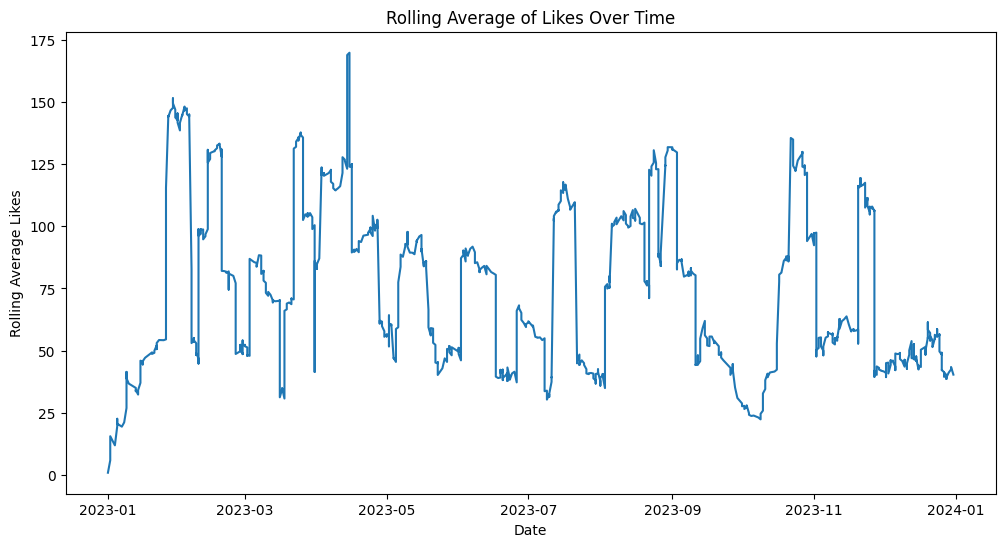


--- 5.4 Likes by User ---


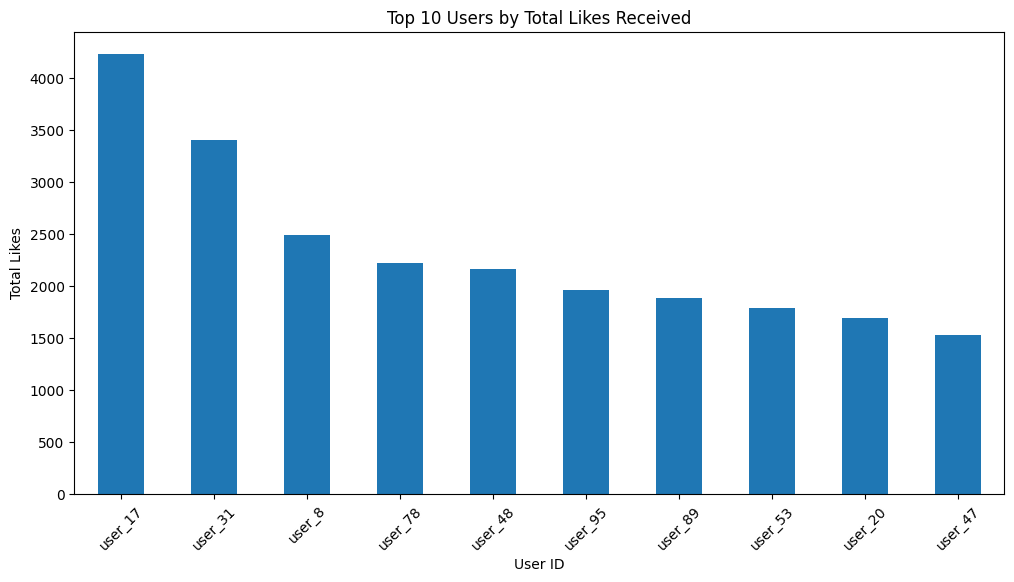

In [28]:
# --- Step 5: Data Visualization ---

# 5.1 Distribution of Likes
print("\n--- 5.1 Distribution of Likes ---")
plt.figure(figsize=(10, 6))
sns.histplot(df['likes'], kde=True)  # Histogram with kernel density estimate
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

# 5.2 Likes by Category
print("\n--- 5.2 Likes by Category ---")
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='likes', data=df)
plt.title('Likes by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.xticks(rotation=45)  # Rotate category labels for readability
plt.show()

#5.3.1 Count categories
print("\n--- 5.3.1 Count categories ---")
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df, order = df['category'].value_counts().index)
plt.title('Count categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 5.3.2 Likes Over Time (using a line plot)
print("\n--- 5.3.2 Likes Over Time ---")

#First, sort by date, then calculate a rolling average
df_sorted = df.sort_values('date')
df_sorted['rolling_avg_likes'] = df_sorted['likes'].rolling(window=30, min_periods=1).mean() # 30-day rolling average

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['date'], df_sorted['rolling_avg_likes'])
plt.title('Rolling Average of Likes Over Time')
plt.xlabel('Date')
plt.ylabel('Rolling Average Likes')
plt.show()

# 5.4  Likes by User
print("\n--- 5.4 Likes by User ---")
user_likes = df.groupby('user_id')['likes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
user_likes.plot(kind='bar')
plt.title("Top 10 Users by Total Likes Received")
plt.xlabel("User ID")
plt.ylabel("Total Likes")
plt.xticks(rotation=45)
plt.show()

## Step 6: Analysis Techniques


--- 6.1 Statistical Tests (ANOVA) ---
F-statistic: 0.90
P-value: 0.494
There is no statistically significant difference in mean likes between the categories.

--- 6.2 Correlation Analysis ---


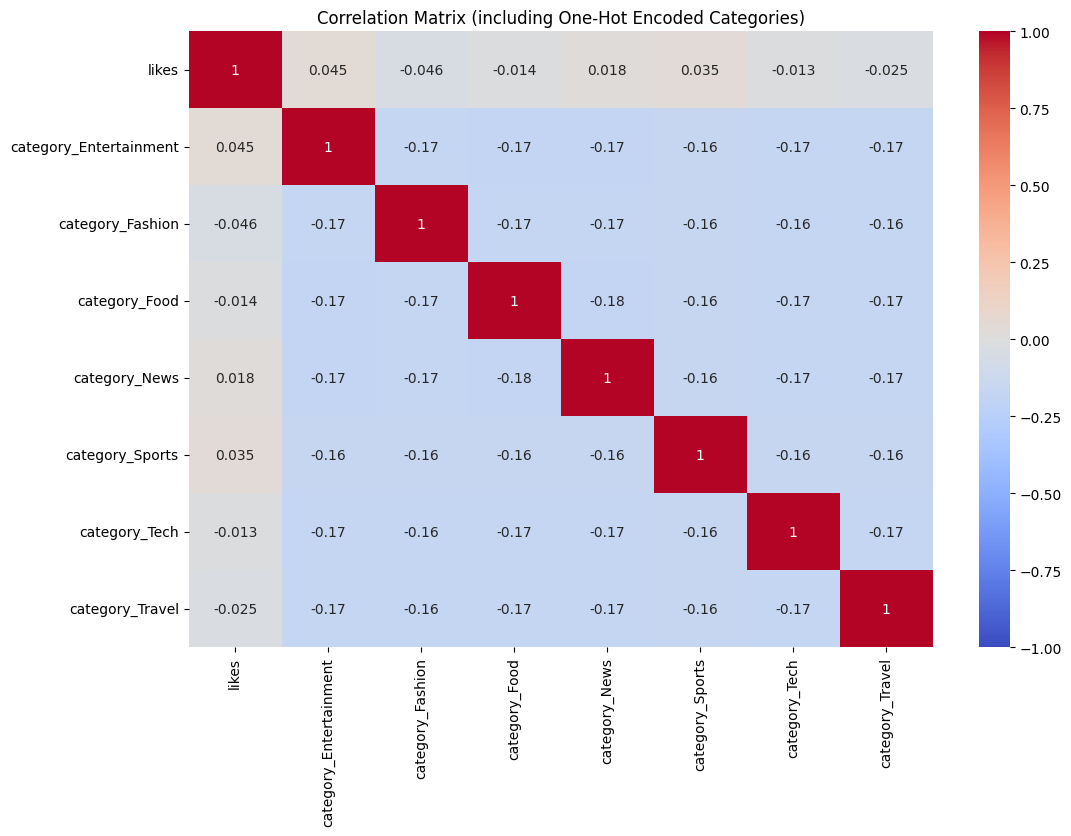

                           likes  category_Entertainment  category_Fashion  \
likes                   1.000000                0.044762         -0.046086   
category_Entertainment  0.044762                1.000000         -0.165626   
category_Fashion       -0.046086               -0.165626          1.000000   
category_Food          -0.013851               -0.172089         -0.169143   
category_News           0.018220               -0.172801         -0.169842   
category_Sports         0.034697               -0.159788         -0.157052   
category_Tech          -0.012570               -0.167072         -0.164211   
category_Travel        -0.024775               -0.167072         -0.164211   

                        category_Food  category_News  category_Sports  \
likes                       -0.013851       0.018220         0.034697   
category_Entertainment      -0.172089      -0.172801        -0.159788   
category_Fashion            -0.169143      -0.169842        -0.157052   
categ

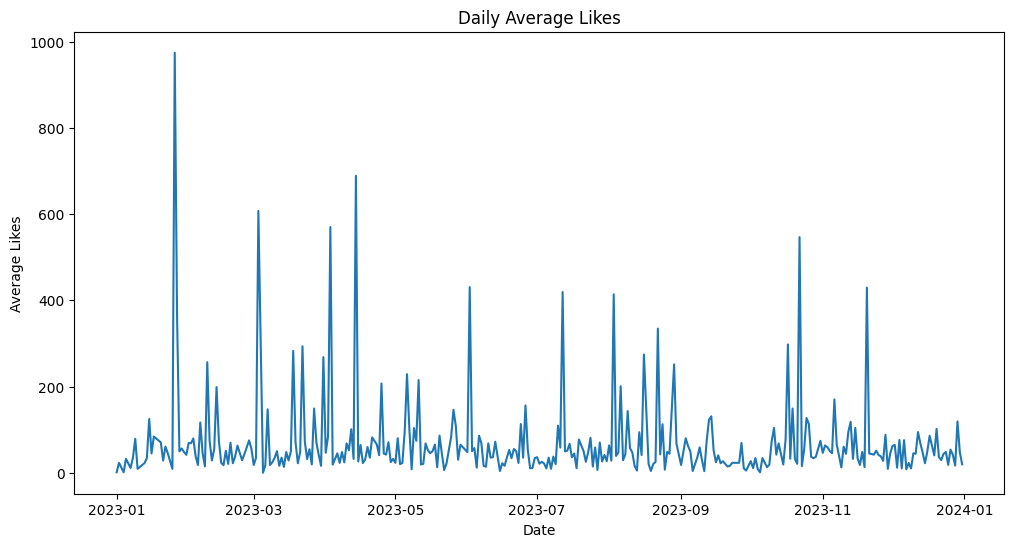

In [29]:
# --- Step 6: Analysis Techniques ---

# 6.1  Statistical Tests (Example: ANOVA for comparing likes across categories)
print("\n--- 6.1 Statistical Tests (ANOVA) ---")
from scipy import stats

# Perform ANOVA to see if there's a statistically significant difference in mean likes between categories.
# We need to create separate groups for each category.
groups = []
for category in df['category'].unique():
    groups.append(df[df['category'] == category]['likes'])

f_statistic, p_value = stats.f_oneway(*groups)  # The * unpacks the list of groups

print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("There is a statistically significant difference in mean likes between at least two categories.")
else:
    print("There is no statistically significant difference in mean likes between the categories.")


# 6.2 Correlation Analysis
print("\n--- 6.2 Correlation Analysis ---")

# One-hot encode the 'category' column
df_encoded = pd.get_dummies(df, columns=['category'], prefix='category',dtype=int)

# Calculate the correlation matrix
correlation_matrix = df_encoded[['likes'] + [col for col in df_encoded.columns if 'category_' in col]].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (including One-Hot Encoded Categories)')
plt.show()

# Print the correlation matrix (optional)
print(correlation_matrix)

# 6.3  Time Series Analysis (basic)
# We already did a rolling average, but we could extend this:

# Calculate daily average likes
daily_likes = df.groupby('date')['likes'].mean().reset_index()

# Plot daily average likes
plt.figure(figsize=(12, 6))
plt.plot(daily_likes['date'], daily_likes['likes'])
plt.title('Daily Average Likes')
plt.xlabel('Date')
plt.ylabel('Average Likes')
plt.show()

## Step 7: Insights and Conclusions

## Summary of Findings

- **Distribution of Likes:** The histogram of likes shows a highly right-skewed distribution.  Most tweets have a relatively small number of likes (concentrated near zero), while a few tweets have a very large number of likes (the long tail extending to the right, and clear outliers in boxplot). This is a common pattern in social media data, where a small number of posts go "viral." The KDE plot gives a smoothed version. The x limet till 2000.

- **Likes by Category (Box Plots):** The box plots reveal some variation in the distribution of likes across the different categories (Travel, Sports, Tech, Fashion, News, Entertainment, Food).  While the medians are relatively similar, the spread (interquartile range) and the presence of outliers differ.  For instance, "Entertainment" shows a slightly higher median and some high-like outliers.  "Food" has a tighter distribution.

- **ANOVA Test:** The ANOVA test results (F-statistic = 0.90, p-value = 0.494) indicate that there is *no statistically significant difference* in the mean number of likes *between* the different categories.  A p-value greater than 0.05 means we fail to reject the null hypothesis (which states that all group means are equal).  This suggests that, *on average*, the category of a tweet doesn't strongly predict its number of likes in this simulated dataset.

- **Correlation Matrix:** The correlation matrix confirms the ANOVA result.  The correlations between 'likes' and the one-hot encoded category variables are all very close to zero (ranging from -0.046 to 0.045).  This indicates a very weak or no linear relationship between the category and the number of likes.  The negative correlations between the category dummy variables are expected; if a tweet belongs to one category, it *cannot* belong to another (because of the one-hot encoding).

- **Rolling Average of Likes Over Time:** This plot shows the 30-day rolling average of likes.  We see fluctuations over time, with some periods of higher average likes and some periods of lower average likes. There are peaks. There does not appear to be a strong upward or downward trend overall; the average engagement fluctuates around a relatively constant level.

- **Daily Average Likes:** This plot shows the average likes per day.  It exhibits considerable day-to-day variability, with some days having much higher average likes than others. There are peaks. This suggests that external factors (e.g., news events, trending topics) or specific viral tweets on those days might be driving these spikes in engagement.

## Recommendations and Next Steps

- **Investigate Outliers:**  The box plots and the histogram clearly show outliers.  It's crucial to investigate these high-like tweets.  Are they genuine viral content, or are they potentially due to bots, promotions, or other artificial inflation of likes?  Understanding the *why* behind these outliers is key.

- **Explore Temporal Patterns:** The daily average likes plot reveals significant daily fluctuations.  Further investigation is warranted:
    - **Day of Week/Time of Day:**  Are certain days of the week or times of day associated with higher engagement?  This could inform optimal posting schedules.
    - **External Events:**  Correlate the spikes in daily likes with external events (news, holidays, trending topics) to see if there are any connections.
    - **Time Series Decomposition:**  Use more advanced time series techniques (e.g., seasonal decomposition) to separate the trend, seasonality, and residual components of the time series.

- **Content Analysis (Beyond This Dataset):**  Since the category alone doesn't explain the variation in likes, the *content* of the tweets is likely a crucial factor.  In a real-world scenario, you would analyze the text of the tweets (using Natural Language Processing - NLP) to identify keywords, topics, sentiment, and other features that might correlate with higher engagement.

- **User Segmentation:**  While we briefly looked at the top users by total likes, a more in-depth user segmentation could be valuable.  Identify different user groups based on their activity, engagement, and influence.

- **Predictive Modeling:** Build a model to predict the number of likes a tweet will receive.  Given the weak correlation with category, you'll likely need to incorporate more features (e.g., from content analysis, user features, and time-based features) to build an accurate model.

## Limitations

- **Simulated Data:** This analysis is based on simulated data.  Real-world social media data is often messier and more complex.
- **Limited Features:**  We only considered category, likes, date, and user ID.  Many other factors influence engagement, including:
    - **Tweet Content:**  The actual text of the tweet (sentiment, keywords, hashtags).
    - **User Features:**  Follower count, verification status, account age.
    - **Network Effects:**  Retweets, replies, mentions.
    - **External Factors:**  News events, trending topics.
- **Linear Correlation:**  The correlation matrix only measures *linear* relationships.  There might be non-linear relationships between category and likes that we haven't captured.
- **No Causal Inference:**  Correlation does not imply causation.  Even if we found strong correlations, we couldn't definitively say that a particular category *causes* a tweet to get more likes.